In [1]:
import cv2
from detect import annotate_balls_angles, detect_balls, detect_balls_relative, detect_table, resize_image

# Open video
input_video = "./data/table_topdown_video_001.mov"  # Replace with your video file
cap = cv2.VideoCapture(input_video)

# Video writer setup
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

print(f"Frame width: {frame_width}, Frame height: {frame_height}, FPS: {fps}")

new_frame_width = 1500
new_frame_height = int(frame_height * (new_frame_width / frame_width))
output_video = cv2.VideoWriter("annotated_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (new_frame_width, new_frame_height))

# read the first frame
_, frame = cap.read()
frame = resize_image(frame)
table_contour = detect_table(frame)
white_ball, yellow_ball, red_ball = detect_balls(frame, cv2.boundingRect(table_contour))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if no frames are left

    frame = resize_image(frame)
    # try and catch any errors
    try:
        white_ball, yellow_ball, red_ball = detect_balls_relative(frame, white_ball, yellow_ball, red_ball)
        new_frame = annotate_balls_angles(frame, white_ball, yellow_ball, red_ball)
        # Write the annotated frame to the output video
        output_video.write(new_frame)
    except Exception as e:
        print(f"Skip frame due to error")

# Release resources
cap.release()
output_video.release()
cv2.destroyAllWindows()

Frame width: 3454, Frame height: 1950, FPS: 58


white_ball: (np.int64(309), np.int64(377), np.int64(13))


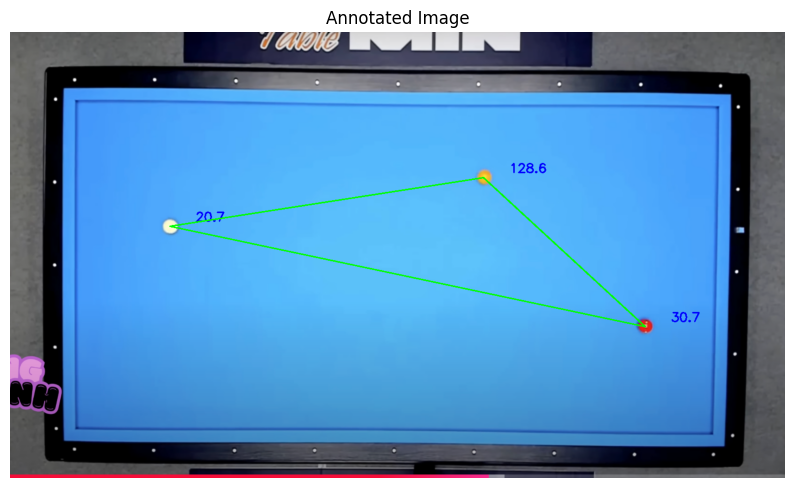

In [1]:
import cv2
from detect import detect_and_annotate
from util import show_image

# Load the image
image_path = 'data/table_topdown_006.png'  # Update this with your image path
original_img = cv2.imread(image_path)

show_image(detect_and_annotate(original_img), "Annotated Image")